# Example of Clustering statistics computation

Example notebook of using classes in clustering module to compute the statistics

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('axes.spines', right=False, top=False)
plt.rc('font', size=25, family='serif')
# clustering
import sys
sys.path.insert(0, '/Users/mthecosmologist/Dropbox/github/DESILSS')
import syslss as cls
import numpy as np
import fitsio as ft

### Reading the galaxy and random samples
Read the input galaxy and random catalog

In [2]:
# # %ls /Volumes/Mehdi_Passport/work/quicksurvey/ELG/truth-mock/
gal = ft.read('/Volumes/Mehdi_Passport/work/quicksurvey/ELG/truth-mock/ELG.fits', upper=True)
ran = ft.read('/Volumes/Mehdi_Passport/work/quicksurvey/ELG/truth-mock/random.fits', upper=True)
class cat(object):
    def __init__(self, ra, dec, z, w):
        self.RA = ra
        self.DEC = dec
        self.Z  = z
        self.Weight = w

galaxy = cat(gal['RA'], gal['DEC'], gal['Z_COSMO'] + gal['DZ_RSD'], np.ones(gal['RA'].size))
random = cat(ran['RA'], ran['DEC'], np.random.choice(galaxy.Z, size=ran['DEC'].size), np.ones(ran['DEC'].size))
del gal, ran

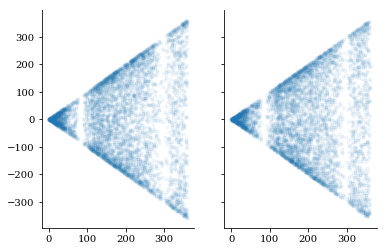

In [3]:
arg1 = np.random.choice(np.arange(0, galaxy.Z.size), size=5000, replace=False)
arg2 = np.random.choice(np.arange(0, random.Z.size), size=5000, replace=False)
# _=plt.hist2d(galaxy['RA'], np.cos(galaxy['DEC']), bins=50)
f,ax= plt.subplots(ncols=2, sharey=True)
dic = {'marker':'.', 'alpha':0.05}
ax[0].scatter(galaxy.RA[arg1], np.cos(galaxy.DEC[arg1])*galaxy.RA[arg1], **dic)
ax[1].scatter(random.RA[arg2], np.cos(random.DEC[arg2])*random.RA[arg2], **dic)

## N(z) calculation

In [4]:
from tools import nzhist

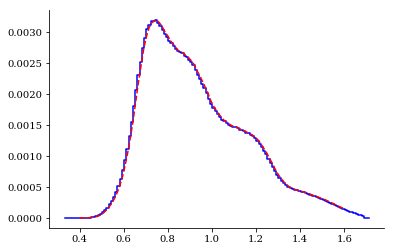

In [6]:
z_data, nz_data = nzhist(galaxy.Z, 0.5, cls.universeparams, binw=0.01)
NofZ = cls.iusp(z_data[:-1], nz_data)
z_plot = np.linspace(0.4, 1.6, 100)
plt.step(z_data[:-1], nz_data, 'b')
plt.plot(z_plot, NofZ(z_plot), 'r--')

In [9]:
pkgrfcat = cls.powerspectrum(galaxy, random, NofZ, universe_params=cls.universeparams)

/Users/mthecosmologist/anaconda3/envs/nbodykit/lib/python3.6/site-packages/nbodykit/cosmology/cosmology.py:160: FutureWarning: This init signature is deprecated; see the Cosmology docstring for new signature
  "docstring for new signature"), FutureWarning)


In [10]:
pkgrf_fkp = pkgrfcat.run((0.5,0.75), 256)

In [13]:
pkgrf = pkgrfcat.run((0.5,0.75), 256, use_fkp=False)

In [14]:
np.save("./outputs/pkGRFv2",pkgrf)

In [11]:
np.save("./outputs/pkGRFfkp",pkgrf_fkp)

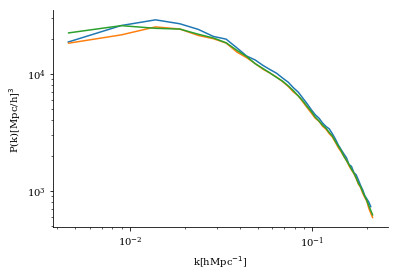

In [15]:
pk = np.load('./outputs/pkGRF.npy').item()
pkv2 = np.load('./outputs/pkGRFv2.npy').item()
pkfpk = np.load('./outputs/pkGRFfkp.npy').item()
plt.plot(pk['poles_data']['k'], pk['poles_data']['power_0'].real-pk['attrs']['shotnoise'])
plt.plot(pkfpk['poles_data']['k'], pkfpk['poles_data']['power_0'].real-pkfpk['attrs']['shotnoise'])
plt.plot(pkv2['poles_data']['k'], pkv2['poles_data']['power_0'].real-pkv2['attrs']['shotnoise'])
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'k[hMpc$^{-1}$]')
_=plt.ylabel(r'P(k)[Mpc/h]$^{3}$')

In [17]:
# a simple 2D clustering based on healpy
grfcat = cls.AngularClustering2D(galaxy, random, nside=64)

In [18]:
grfcat2D = grfcat.run()

In [19]:
from healpy import mollview

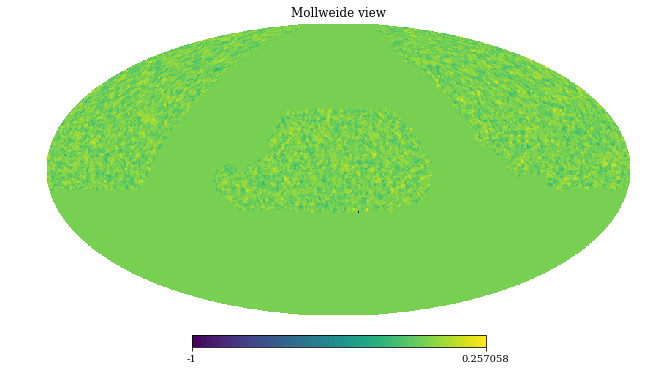

In [20]:
mollview(grfcat.delta)

In [21]:
grfcat2Dpc = grfcat.run_paircount()

Text(0,0.5,'C$_{l}$')

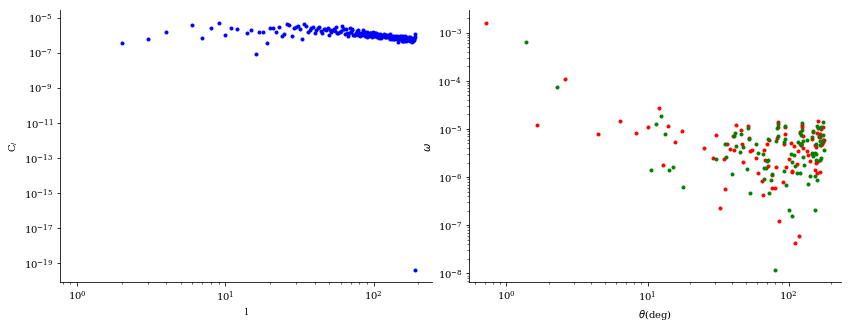

In [22]:
f,ax=plt.subplots(ncols=2, figsize=(14,5))
f.subplots_adjust(wspace=0.1)
ax[0].plot(grfcat2D['cl'][0], grfcat2D['cl'][1], marker='.', ls='None',color='blue')
ax[1].plot(grfcat2D['xi'][0], grfcat2D['xi'][1], marker='.', ls='None',color='red')
ax[1].plot(grfcat2Dpc[0], grfcat2Dpc[1], marker='.', ls='None',color='g')
for axi in ax:
    axi.set_xscale('log')
    axi.set_yscale('log')
ax[1].set_xlabel(r'$\theta$(deg)')
ax[1].set_ylabel(r'$\omega$')
ax[0].set_xlabel(r'l')
ax[0].set_ylabel(r'C$_{l}$')

In [ ]:
edges = np.linspace(0.01, 10., 11)

In [ ]:
angular_pc = cls.paircounting(galaxy, random)

In [ ]:
angular_pc_results = angular_pc.angular(edges=edges)

In [ ]:
def plot_paircount(result):
    plt.figure()
    dd = result[0]
    rr = result[1]
    dr = result[2]
    f = result[3]
    plt.plot(dd['theta'], (dd['npairs']-2*f*dr['npairs']+f*f*rr['npairs'])/(f*f*rr['npairs']), ls='None', marker='.')
    plt.plot(grfcat2D['xi'][0], grfcat2D['xi'][1], marker='+', ls='None',color='red')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlim(xmax=50)
plot_paircount(angular_pc_results)